<a href="https://colab.research.google.com/github/dmitriygorlov/Yandex.Practikum_Data_Science/blob/main/Module-04_01-Data-retrieval_SQL/project-13_postgre-sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Спрос на рейсы авиакомпании

Нужно проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-запросы" data-toc-modified-id="SQL-запросы-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>SQL запросы</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Модели-самолётов-и-количество-рейсов" data-toc-modified-id="Модели-самолётов-и-количество-рейсов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модели самолётов и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## SQL запросы

Для дальнейшей работы с таблицами, были сформированы запросы к базе данных.

- Запрос №1: Вывести количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года

```
SELECT
    aircrafts.model AS model,
    COUNT(flight_id) AS flights_amount
FROM
    flights
    INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    flights.departure_time :: date BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    aircrafts.model
```
- Запрос №3: Посчитать среднее количество прибывающих рейсов в день для каждого города за август 2018 года.

```
SELECT
    SUBQ.city,
    AVG(SUBQ.count) AS average_flights
FROM
    (
        SELECT
            airports.city,
            EXTRACT(day FROM flights.arrival_time) AS day,
            COUNT(*) AS count
        FROM
            flights
            INNER JOIN airports ON airports.airport_code = flights.arrival_airport
        WHERE
            CAST(flights.arrival_time AS date) BETWEEN '2018-08-01' AND '2018-08-31'   
        GROUP BY
            airports.city,
            day
    )AS SUBQ
GROUP BY
    SUBQ.city;
```

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузили библиотеки

In [2]:
query_1 = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')
query_3 = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

Загрузили файлы

In [3]:
display(query_1)
print(query_1.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


Первая таблица небольшая: 2 столбца (модели самолетов и количество рейсов), 8 строк (кол-во моделей самолетов). Типы данных в столбцах подходящие (текст - object, целые числа кол-ва перелетов - int64), пропусков нет. Таблица готова к анализу.

In [4]:
display(query_3.head())
print(query_3.info())
print()
print(query_3.isna().sum())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

city               0
average_flights    0
dtype: int64


Вторая таблица побольше: 2 столбца (город и среднее количество прибывающих рейсов за день), 101 строка (кол-во городов). Таблица отсортирована по наименованию городов (по алфавиту). Типы данных в столбцах подходящие (текст - object, среднее кол-во прилетов - float64), пропусков нет. Таблица готова к анализу. Сделаем также сокращенную таблицу "Топ-10 городов по кол-ву рейсов"

In [5]:
top10_query_3 = query_3.sort_values('average_flights', ascending = False).head(10).reset_index(drop = True)
display(top10_query_3)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Таблица "Топ-10 городов по кол-ву рейсов" готова, по ней видно как сильно выделяется первое место (Москва), а также заметно много рейсов в Санкт-Петербурге и Новосибирске. Перейдём к графикам и визуальному анализу

## Аналитика

### Модели самолётов и количество рейсов

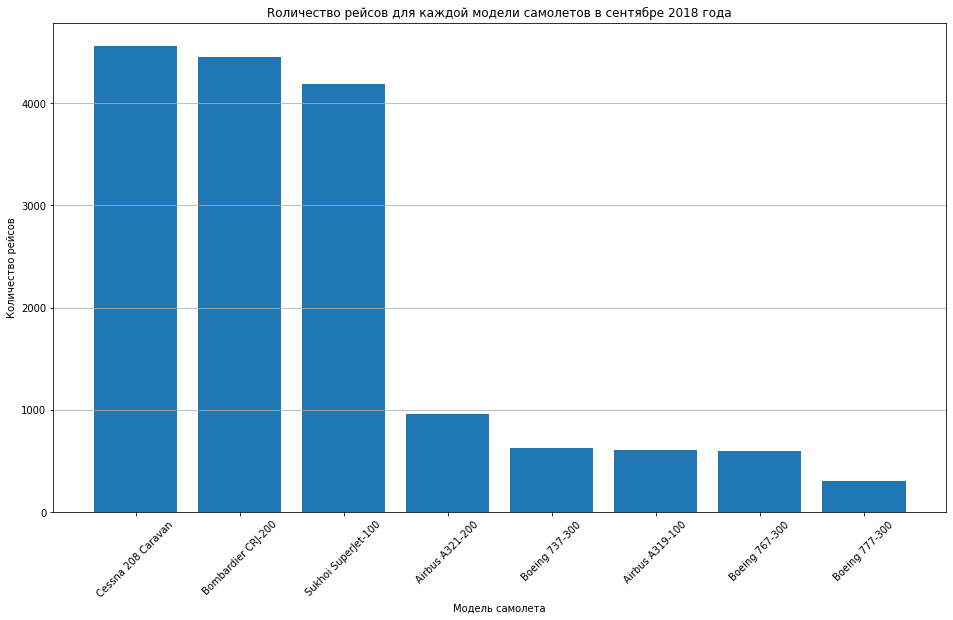

In [6]:
query_1.sort_values('flights_amount', ascending = False, inplace = True)

plt.figure(figsize = (16, 9))
plt.bar(query_1['model'], query_1['flights_amount'])
plt.grid(axis = 'y')
plt.xticks(rotation=45)
plt.title('Rоличество рейсов для каждой модели самолетов в сентябре 2018 года')
plt.ylabel('Количество рейсов')
plt.xlabel('Модель самолета')
plt.show()

По графику можно сделать следующие выводы:
- Количество полетов неравномерно распределено между разными моделями. Есть три лидера с большим отрывом Cessna 208, Bombardier CRJ-200, Sukhoi Superjet-100 с количеством полетов свыше 4000, а у остальных моделей полетов менее 1000;
- Больше всего полетов у малой авиации (Cessna) и региональной (Bombardier), а также отечественной (Superjet)
- Три лидера представляют единственную модель в бренде, Airbus и Boeing "поделены" на несколько моделей. Однако даже суммируя по бренду, позиция тройки лидеров не сменится

### Города и количество рейсов

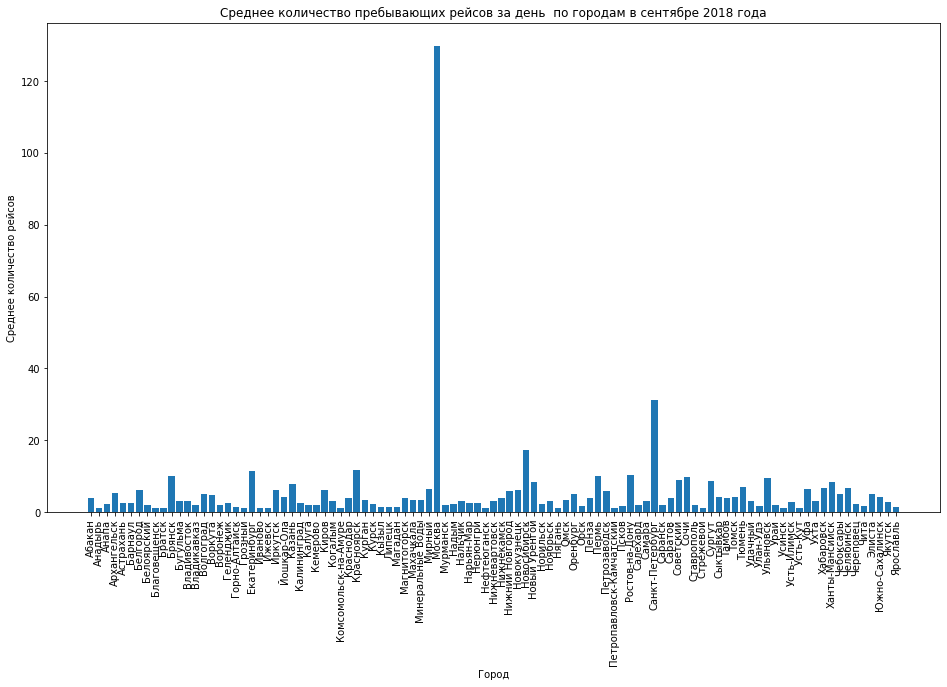

In [7]:
plt.figure(figsize = (16, 9))
plt.bar(query_3['city'], query_3['average_flights'])
# plt.grid(axis = 'y')
plt.xticks(rotation=90)
plt.title('Среднее количество пребывающих рейсов за день  по городам в сентябре 2018 года')
plt.ylabel('Среднее количество рейсов')
plt.xlabel('Город')
plt.show()

По общему графику мало что можно сказать - слишком много объектов (городов), а также очень сильно выделяется Москва и "рушит" масштаб оси Х. Уберем Москву и Санкт-Петербург и отсортируем значения.

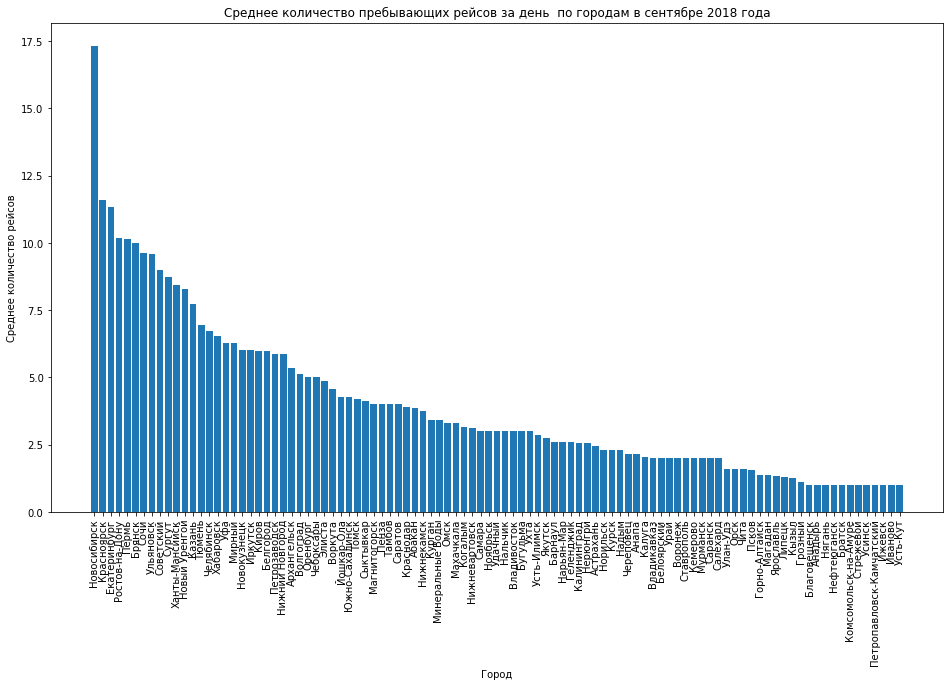

In [8]:
nobig_query_3 = query_3[(query_3['city'] != 'Москва') & (query_3['city'] != 'Санкт-Петербург')].sort_values('average_flights', ascending = False)
plt.figure(figsize = (16, 9))
plt.bar(nobig_query_3['city'], nobig_query_3['average_flights'])
# plt.grid(axis = 'y')
plt.xticks(rotation=90)
plt.title('Среднее количество пребывающих рейсов за день  по городам в сентябре 2018 года')
plt.ylabel('Среднее количество рейсов')
plt.xlabel('Город')
plt.show()

По получившемуся "усеченному" графику видно, что кроме выбросов столиц (Москвы и Санкт-Петербурга), а также Новосибирска (видимо ввиду его "аналогичного" географического и экономического значения в Сибири) больше никаких особенностей или кластеров нет. Посмотрим на гистограму (для удобства возьмём значения до 12 без Москвы, Санкт-Петербурга и Новосибирска).

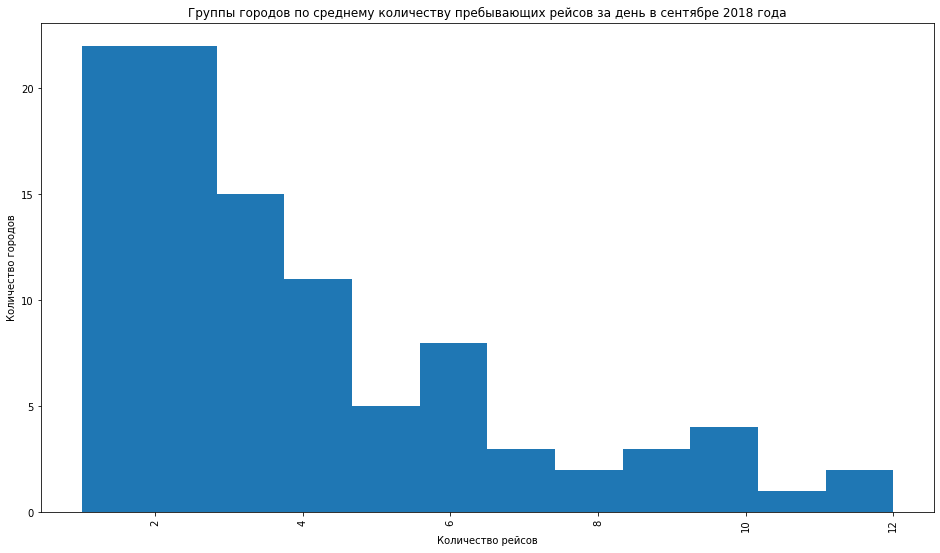

In [9]:
plt.figure(figsize = (16, 9))
plt.hist(nobig_query_3['average_flights'], range = (1, 12), bins = 12)
# plt.grid(axis = 'y')
plt.xticks(rotation=90)
plt.title('Группы городов по среднему количеству пребывающих рейсов за день в сентябре 2018 года')
plt.ylabel('Количество городов')
plt.xlabel('Количество рейсов')
plt.show()

По Гистограмме видно, что половина городов принимает меньше 3 рейсов в день (в среднем) и лишь четверть принимает свыше 6 рейсов (в среднем). 

### Топ-10 городов и количество рейсов

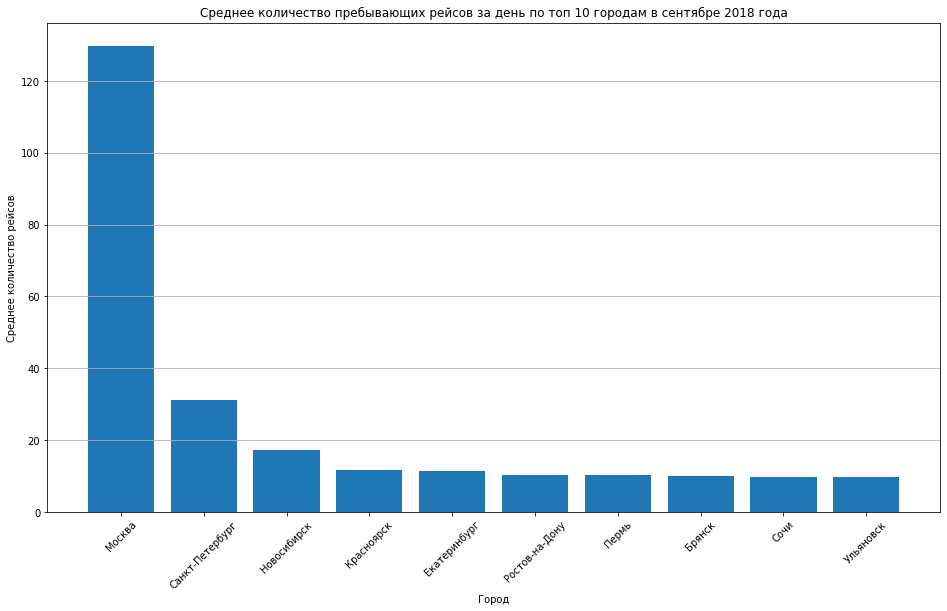

In [10]:
plt.figure(figsize = (16, 9))
plt.bar(top10_query_3['city'], top10_query_3['average_flights'])
plt.grid(axis = 'y')
plt.xticks(rotation=45)
plt.title('Среднее количество пребывающих рейсов за день по топ 10 городам в сентябре 2018 года')
plt.ylabel('Среднее количество рейсов')
plt.xlabel('Город')
plt.show()

По графику Топ 10 городов по среднему количеству рейсов можно сказать следующее:
- Безусловным лидером по количеству рейсов является Москва - более половины рейсов из Топ 10 городов приходится на столицу!
- Выдающимися городами по числу рейсов (кроме Москвы) являются Санкт-Петербург (свыше 30 рейсов) и Новосибирск (свыше 17).
- Города с 4 по 10 место ринимают около 10 рейсов в день.

## Общий вывод

Главный вывод: **Главным городом по количеству прибывающих рейсов с отрывом в 4 раза от ближайшего соперника является Москва, при этом самой часто летающей моделью самолета по стране является Cessna**

Также интересно подметить:
- В Москву прилетает столько же рейсов, сколько в другие города из топ 10 вместе взятые
- Второе место по прилетам занимает Санкт-Петербург, а третье Новосибирск
- В половину городов прилетает меньше 3 самолетов в день
- Второе место по популярности среди моделей самолетов занимает Bombardier CRJ-200, а на третьем отечественный Sukhoi Superjet-100
- Топ 3 модели самолетов сильно отрываются по количеству от остальных моделей (в топ 3 модели летают свыше 4000 рейсов, остальные модели менее 1000)